# UB DataScience: Complex networks
### David Solans & Gerard Martinez

In [12]:

import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
from networkx.algorithms import community
import collections
import numpy as np
import pickle
import operator
import folium
from scipy.optimize import curve_fit
from statistics import mean

plt.style.use('seaborn')

%matplotlib inline

## Loading data

In [2]:
G_transport = nx.read_edgelist("barcelona_transport.edgelist", create_using = nx.Graph(), nodetype = int)
G_bus = nx.read_edgelist("barcelona_bus.edgelist", create_using = nx.Graph(), nodetype = int)
G_metro = nx.read_edgelist("barcelona_metro.edgelist", create_using = nx.Graph(), nodetype = int)

In [3]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
bus_stations_properties = load_obj("bus_stations_properties")

## Week 4 - Comparing our graph with randomly generated graphs

In [5]:
# Function that compares two given graphs, G1 and G2
# G1 is the original graph
# G2 is the randomly generated one
def compare_random_graphs(g1, g2):
    print("ORIGINAL GRAPH: ",nx.info(g1))
    components_g1 = 0
    radius_components_g1 = []
    for g in nx.connected_component_subgraphs(g1): 
        radius_components_g1.append(nx.radius(g)) 
        components_g1+=1;
    print('\nNumber of disconnected components:',components_g1)    
    print("Radius of the components: ", radius_components_g1)
    print("Mean radius: ", np.mean(radius_components_g1))
    print()
    
    print("GENERATED GRAPH: ",nx.info(g2))
    components_g2 = 0
    radius_components_g2 = []
    for g in nx.connected_component_subgraphs(g2): 
        radius_components_g2.append(nx.radius(g)) 
        components_g2+=1;
    print('\nNumber of disconnected components:',components_g2)    
    print("Radius of the components: ", radius_components_g2)
    print("Mean radius: ", np.mean(radius_components_g2))
    print()
    
    #Degree distribution
    #G1
    degree_distrib_g1=sorted([d for n, d in g1.degree()], reverse=True)
    #G2
    degree_distrib_g2=sorted([d for n, d in g2.degree()], reverse=True)
    
    #Betwenness centrality
    #G1
    node_betweeness_centrality_g1 = []
    for g in nx.connected_component_subgraphs(g1): 
        node_betweeness_centrality_g1.append(nx.betweenness_centrality_source(g).values())
    #G2
    node_betweeness_centrality_g2 = []
    for g in nx.connected_component_subgraphs(g2): 
        node_betweeness_centrality_g2.append(nx.betweenness_centrality_source(g).values())
    
    #Closeness centrality
    #G1
    node_closeness_centrality_g1 = []
    for g in nx.connected_component_subgraphs(g1): 
        node_closeness_centrality_g1.append(nx.closeness_centrality(g).values())
    #G2
    node_closeness_centrality_g2 = []
    for g in nx.connected_component_subgraphs(g2): 
        node_closeness_centrality_g2.append(nx.closeness_centrality(g).values())

    pos_g1 = nx.spring_layout(g1)
    pos_g2 = nx.spring_layout(g2)
    
        
    plt.figure(figsize=(15,10))
    
    #Plotting G1
    #Degree distribution
    ax = plt.subplot(311)
    
    plt.hist(degree_distrib_g1,bins=100,label='Degree distribution. Original')
    plt.hist(degree_distrib_g2,bins=100,label='Degree distribution. Random Generated')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='upper right')
    ax.set_title("Degree distribution")
    plt.show()

    plt.figure(figsize=(15,10))
    ax = plt.subplot(312)
    
    #Betwenness centrality
    #[item for sublist in l for item in sublist]
    flat_list1 = [item for sublist in node_betweeness_centrality_g1 for item in sublist]
    flat_list2 = [item for sublist in node_betweeness_centrality_g2 for item in sublist]
    
    plt.hist(flat_list1,bins=100,label='Betweeness centrality. Original')
    plt.hist(flat_list2,bins=100,label='Betweeness centrality. Random Generated')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='upper right')
    ax.set_title("Betweeness centrality distribution")
    plt.show()
    
    plt.figure(figsize=(15,10))
    ax = plt.subplot(313)
    #Closeness centrality
    flat_list3 = [item for sublist in node_closeness_centrality_g1 for item in sublist]
    flat_list4 = [item for sublist in node_closeness_centrality_g2 for item in sublist]
    plt.hist(flat_list3,bins=100,label='Closeness centrality. Original')
    plt.hist(flat_list4,bins=100,label='Closeness centrality. Random Generated')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='upper right')
    ax.set_title("Closeness centrality distribution")
    plt.show()
    

#### Watts Strotgaz


ORIGINAL GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330

Number of disconnected components: 3
Radius of the components:  [20, 6, 14]
Mean radius:  13.333333333333334

GENERATED GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 2469
Average degree:   2.0000

Number of disconnected components: 4
Radius of the components:  [310, 296, 17, 14]
Mean radius:  159.25



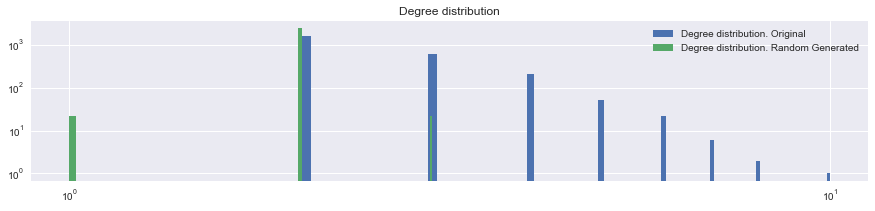

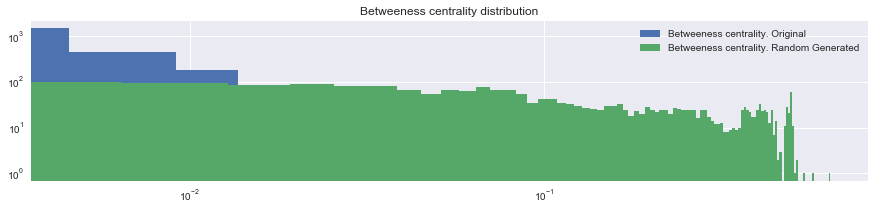

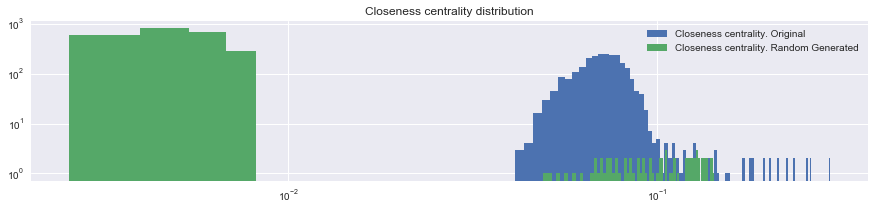

In [63]:
### Watts Strotgaz
n = len(G_bus.nodes()) # Number of nodes
k = 2 # Each node is joined with its k nearest neighbors in a ring topology.
p = 0.01 # The probability of rewiring each edge
tries=10 #Number of attempts to generate a connected graph.
seed = 100

random_graph1 = nx.watts_strogatz_graph(n, k, p, seed=seed)

compare_random_graphs(G_bus, random_graph1)

#### Connected Watts Strotgaz 

ORIGINAL GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330

Number of disconnected components: 3
Radius of the components:  [20, 6, 14]
Mean radius:  13.333333333333334

GENERATED GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 4938
Average degree:   4.0000

Number of disconnected components: 1
Radius of the components:  [53]
Mean radius:  53.0



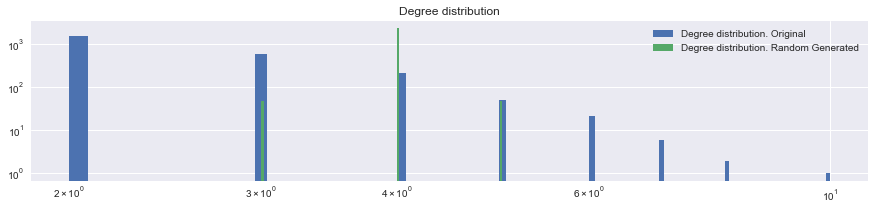

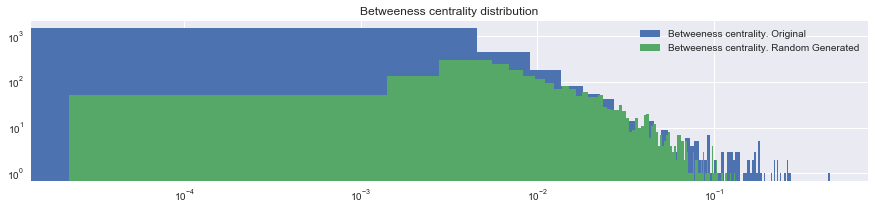

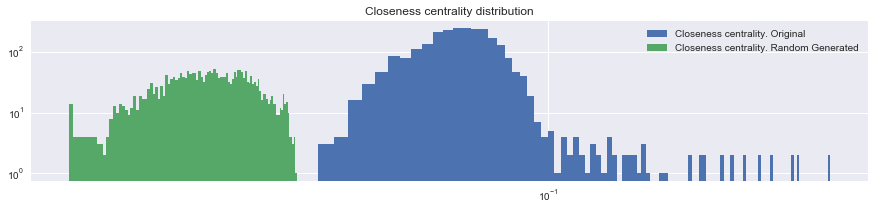

In [64]:
### Connected Watts Strotgaz
n = len(G_bus.nodes()) # Number of nodes
k = 4 # Each node is joined with its k nearest neighbors in a ring topology.
p = 0.01 # The probability of rewiring each edge
tries=100 #Number of attempts to generate a connected graph.
seed = 100

random_graph2 = nx.connected_watts_strogatz_graph(n, k, p, tries=tries, seed=seed)

compare_random_graphs(G_bus, random_graph2)

#### Erdos Renyi

ORIGINAL GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330

Number of disconnected components: 3
Radius of the components:  [20, 6, 14]
Mean radius:  13.333333333333334

GENERATED GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 30488
Average degree:  24.6966

Number of disconnected components: 1
Radius of the components:  [3]
Mean radius:  3.0



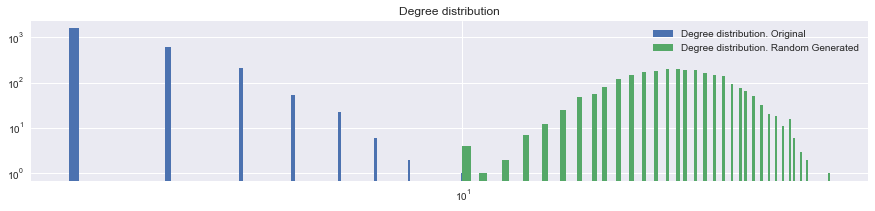

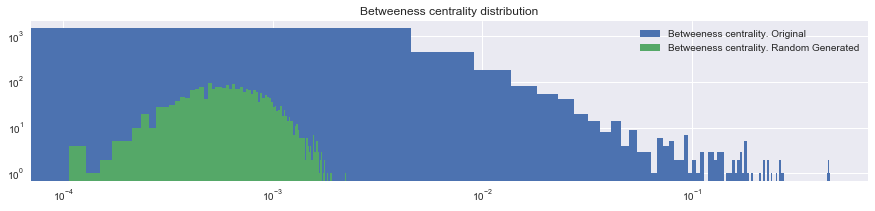

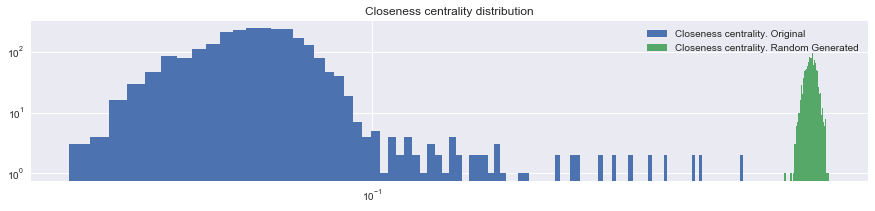

In [65]:
### Erdos Renyi
n = len(G_bus.nodes()) # Number of nodes
p = 0.01 # Probability for edge creation.

seed = 100

random_graph3 = nx.erdos_renyi_graph(n, p, seed=seed)

compare_random_graphs(G_bus, random_graph3)

#### Barabsi Albert

M-> 3
ORIGINAL GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330

Number of disconnected components: 3
Radius of the components:  [20, 6, 14]
Mean radius:  13.333333333333334

GENERATED GRAPH:  Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 7398
Average degree:   5.9927

Number of disconnected components: 1
Radius of the components:  [4]
Mean radius:  4.0



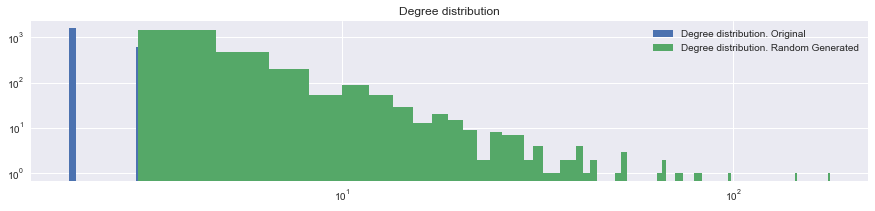

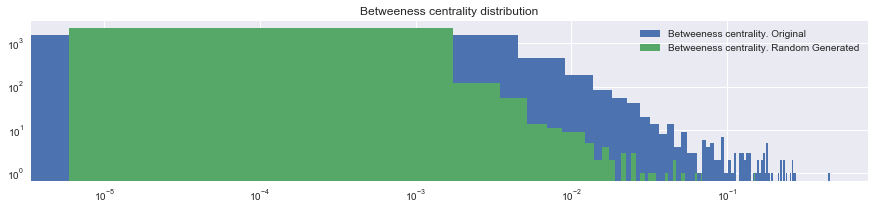

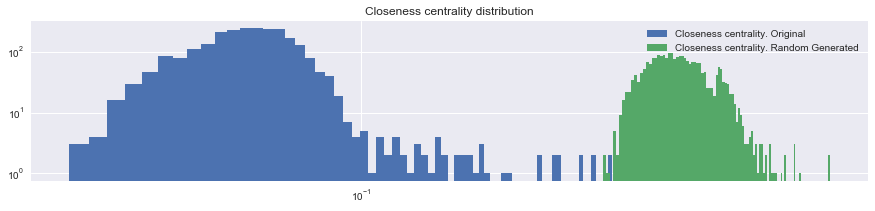

In [17]:
### Barabasi Albert
n = len(G_bus.nodes()) # Number of nodes
avg_degrees = nx.average_degree_connectivity(G_bus).values()

m = int(mean(avg_degrees)) # M is the number of connections for each new node

print("M-> %s" % m)
seed = 100

random_graph4 = nx.barabasi_albert_graph(n, m, seed=seed)
compare_random_graphs(G_bus, random_graph4)